In [13]:
import pandas as pd

# Load CSV data into a pandas DataFrame
csv_file_path = r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\unnati_phase1_data_revised.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(csv_file_path)



In [2]:
# Find total number of entries
total_entries = len(data)
print("Total entries:", total_entries)

# Data types of each column
column_data_types = data.dtypes
print("\nData types of each column:")
print(column_data_types)




Total entries: 21325

Data types of each column:
Alert       object
Date        object
Time        object
Lat        float64
Long       float64
Vehicle      int64
Speed        int64
dtype: object


In [3]:
# Finding duplicate values
duplicate_rows = data[data.duplicated(keep=False)]
print("\nCompletely duplicate entries:")
print(duplicate_rows)



Completely duplicate entries:
         Alert        Date      Time        Lat       Long  Vehicle  Speed
334    cas_hmw  01-06-2022  16:52:41  12.798124  80.022267      805     50
335    cas_hmw  01-06-2022  16:52:41  12.798124  80.022267      805     50
760    cas_hmw  02-06-2022  09:23:29  12.879598  80.080102     5339     26
761    cas_hmw  02-06-2022  09:23:29  12.879598  80.080102     5339     26
793    cas_hmw  02-06-2022  16:36:08  12.862839  80.073890      805     40
...        ...         ...       ...        ...        ...      ...    ...
21113  cas_hmw  31-08-2022  06:43:50  13.067304  80.251458     5339     29
21295  cas_hmw  31-08-2022  17:36:07  13.017504  80.260434     5339     23
21296  cas_hmw  31-08-2022  17:36:07  13.017504  80.260434     5339     23
21302  cas_hmw  31-08-2022  17:38:16  13.023839  80.264262     5339     30
21303  cas_hmw  31-08-2022  17:38:16  13.023839  80.264262     5339     30

[757 rows x 7 columns]


In [4]:
# Total entries for each alert 
alert_counts = data['Alert'].value_counts()
print("\nTotal entries for each alert:")
print(alert_counts)


Total entries for each alert:
cas_hmw    12328
cas_ldw     6431
cas_pcw     1976
cas_fcw      590
Name: Alert, dtype: int64


In [ ]:
## Removing duplicate entries

In [5]:
data_1 = pd.read_csv(csv_file_path)

# Remove completely duplicate rows and keep the original
data_cleaned = data_1.drop_duplicates(keep='first')

# Find total number of entries after removing duplicates
total_cleaned_entries = len(data_cleaned)
print("Total entries after removing duplicates:", total_cleaned_entries)

Total entries after removing duplicates: 20936


In [6]:
# Finding duplicate values
duplicate_rows = data_cleaned[data_cleaned.duplicated(keep=False)]
print("\nCompletely duplicate entries:")
print(duplicate_rows)



Completely duplicate entries:
Empty DataFrame
Columns: [Alert, Date, Time, Lat, Long, Vehicle, Speed]
Index: []


In [7]:
# Total entries for each alert 
alert_counts_1 = data_cleaned['Alert'].value_counts()
print("\nTotal entries for each alert:")
print(alert_counts_1)


Total entries for each alert:
cas_hmw    11939
cas_ldw     6431
cas_pcw     1976
cas_fcw      590
Name: Alert, dtype: int64


## Analysing the alerts in specific hours of the day

C:\Users\sams.sridharan\AppData\Local\Temp\ipykernel_13824\2570357455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['datetime'] = pd.to_datetime(data_cleaned['Date'] + ' ' + data_cleaned['Time'])
C:\Users\sams.sridharan\AppData\Local\Temp\ipykernel_13824\2570357455.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['hour'] = data_cleaned['datetime'].dt.hour


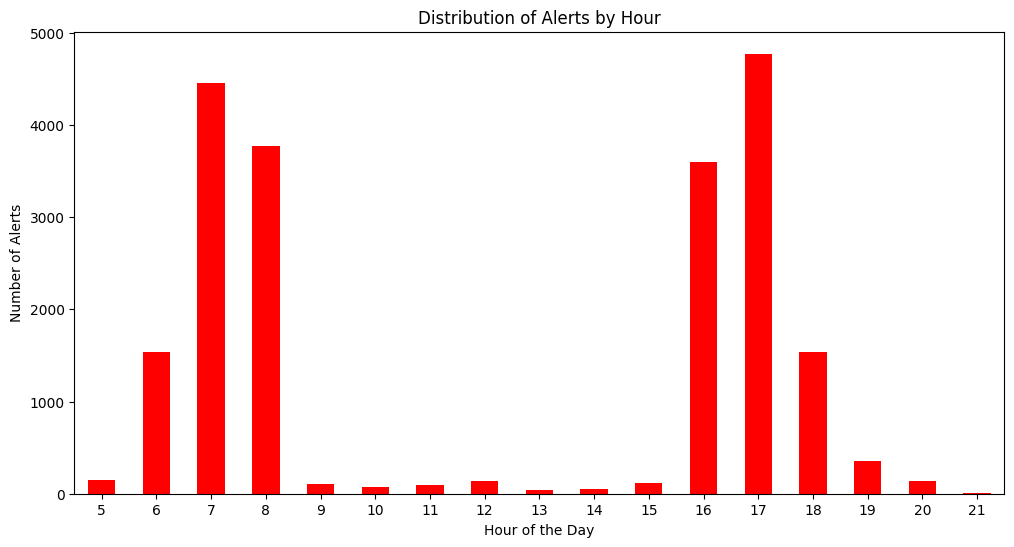

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data_cleaned['datetime'] = pd.to_datetime(data_cleaned['Date'] + ' ' + data_cleaned['Time'])

# Set the 'datetime' column as the index for time-based analysis


# Extract hour from datetime
data_cleaned['hour'] = data_cleaned['datetime'].dt.hour

# Count the number of alerts triggered in each hour
alerts_by_hour = data_cleaned.groupby('hour')['Alert'].count()

# Plotting the distribution of alerts by hour in a bar graph
plt.figure(figsize=(12, 6))
alerts_by_hour.plot(kind='bar', color='red')
plt.title('Distribution of Alerts by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Alerts')
plt.xticks(rotation=0)
plt.show()


## Analysing the number of alerts across various days

C:\Users\sams.sridharan\AppData\Local\Temp\ipykernel_13824\2922591273.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['datetime'] = pd.to_datetime(data_cleaned['Date'] + ' ' + data_cleaned['Time'])
C:\Users\sams.sridharan\AppData\Local\Temp\ipykernel_13824\2922591273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['day_of_week'] = data_cleaned['datetime'].dt.day_name()


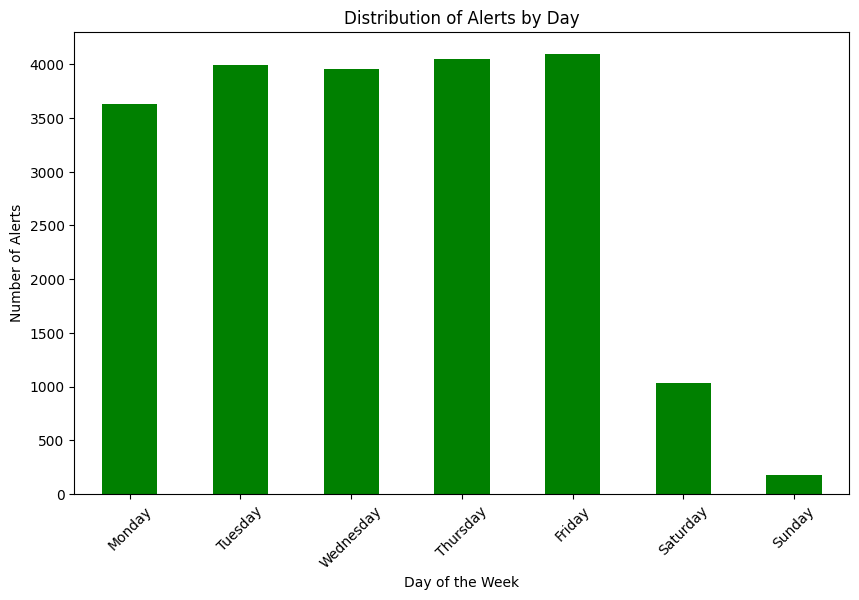

In [30]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'date' and 'time' columns to a single datetime column
data_cleaned['datetime'] = pd.to_datetime(data_cleaned['Date'] + ' ' + data_cleaned['Time'])

# Extract day of the week from datetime
data_cleaned['day_of_week'] = data_cleaned['datetime'].dt.day_name()

# Count the number of alerts triggered on each day
alerts_by_day = data_cleaned.groupby('day_of_week')['Alert'].count()

# Define the order of days of the week for plotting
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the distribution of alerts by day in a bar graph
plt.figure(figsize=(10, 6))
alerts_by_day.reindex(days_order).plot(kind='bar', color='green')
plt.title('Distribution of Alerts by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Alerts')
plt.xticks(rotation=45)
plt.show()


## Alerts triggered by different vehicles

<Figure size 1200x600 with 0 Axes>

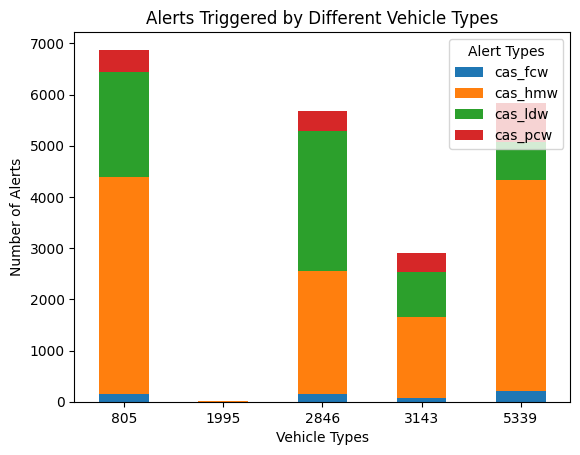

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

# Load CSV data into a pandas DataFrame
csv_file_path = r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\unnati_phase1_data_revised.csv'  # Replace with the actual path to your CSV file
data = pd.read_csv(csv_file_path)


# Group data by 'vehicle' and 'alerts' columns, and count the occurrences
alerts_by_vehicle = data.groupby(['Vehicle', 'Alert'])['Alert'].count().unstack().fillna(0)

# Plotting a bar graph to show patterns of alerts triggered by different vehicle types
plt.figure(figsize=(12, 6))
alerts_by_vehicle.plot(kind='bar', stacked=True)
plt.title('Alerts Triggered by Different Vehicle Types')
plt.xlabel('Vehicle Types')
plt.ylabel('Number of Alerts')
plt.xticks(rotation=0)
plt.legend(title='Alert Types')
plt.show()


## Identifying high alert areas or accident prone zones

#BELOW:
    
High-Alert Areas: Clusters with a high concentration of alerts could indicate areas where 
drivers face frequent issues or challenges, such as lane departures or headway violations.

Accident-Prone Zones: Clusters located in high-traffic or complex road areas might represent 
zones with higher accident risk due to the increased frequency of alerts.

C:\Users\sams.sridharan\anaconda3\envs\tfEnv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


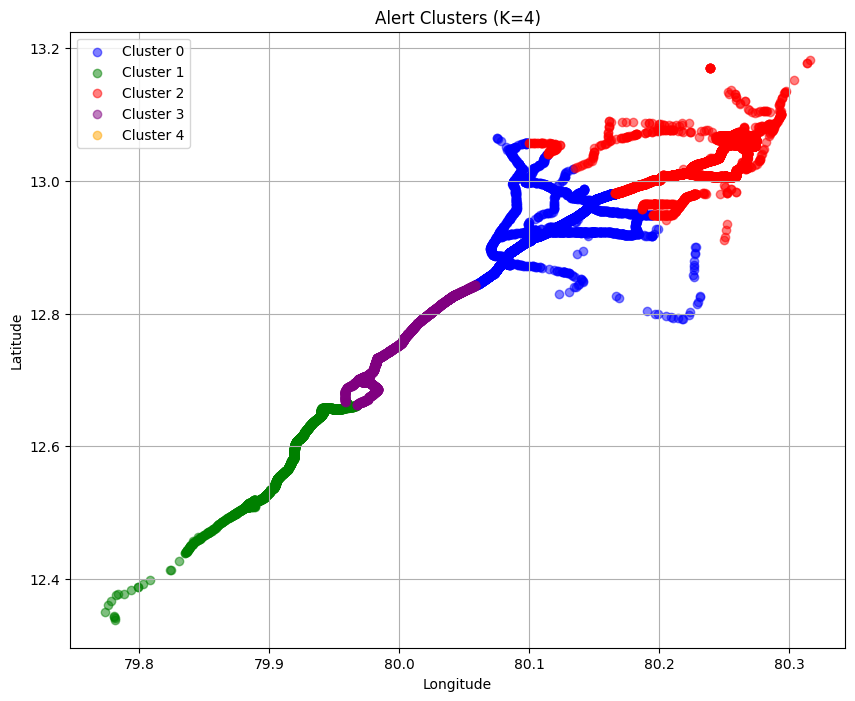

In [22]:




import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Convert 'Date' and 'Time' columns to a single datetime column
data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Set the 'datetime' column as the index for time-based analysis
data.set_index('datetime', inplace=True)

# Select columns for clustering
coordinates = data[['Long', 'Lat', 'Alert']]

# Choose the number of clusters
num_clusters = 4
# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
data['cluster'] = kmeans.fit_predict(coordinates[['Long', 'Lat']])

# Create a dictionary to map cluster numbers to colors
cluster_colors = {0: 'blue', 1: 'green', 2: 'red', 3: 'purple', 4: 'orange'}

# Plotting the clusters on a scatter plot with legends
plt.figure(figsize=(10, 8))
for cluster, color in cluster_colors.items():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Long'], cluster_data['Lat'], color=color, alpha=0.5, label=f'Cluster {cluster}')
plt.title(f'Alert Clusters (K={num_clusters})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.legend()
plt.show()


In [19]:
import pandas as pd

# Save the modified DataFrame back to the original CSV file
data.to_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\unnati_phase1_data_revised.csv', index=False)  # Set index=False to exclude the index column


## Finding instances where 
## i) cas_fcw is triggered after cas_hmw
## ii) cas_pcw is triggered after cas_ldw
## iii) cas_ldw is triggered after cas_pcw

In [17]:

import pandas as pd

# Load CSV files for each vehicle into separate DataFrames
vehicle1_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_805.csv')
vehicle2_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_1995.csv')
vehicle3_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_2846.csv')
vehicle4_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_3143 (1).csv')
vehicle5_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_5339.csv')

vehicle1_hmw = vehicle1_data[vehicle1_data['Alert'] == 'cas_hmw']
vehicle2_hmw = vehicle2_data[vehicle2_data['Alert'] == 'cas_hmw']
vehicle3_hmw = vehicle3_data[vehicle3_data['Alert'] == 'cas_hmw']
vehicle4_hmw = vehicle4_data[vehicle4_data['Alert'] == 'cas_hmw']
vehicle5_hmw = vehicle5_data[vehicle5_data['Alert'] == 'cas_hmw']

def check_for_fcw_after_hmw(hmw_data, fcw_data):
    # Iterate through 'cas_hmw' rows
    for hmw_index, hmw_row in hmw_data.iterrows():
        # Get the date and time of 'cas_hmw'
        hmw_date = hmw_row['Date']
        hmw_time = hmw_row['Time']
        hmw_datetime = f"{hmw_date} {hmw_time}"
        
        # Check if there's a corresponding 'cas_fcw' row with the same date and time
        matching_fcw = fcw_data[
            (fcw_data['Date'] == hmw_date) &
            (fcw_data['Time'] == hmw_time) &
            (fcw_data['Vehicle'] == hmw_row['Vehicle'])  # Ensure it's the same vehicle
        ]
        
        if not matching_fcw.empty:
            print(f"Found 'cas_fcw' after 'cas_hmw' for vehicle {hmw_row['Vehicle']} at datetime {hmw_datetime}")

# Check for 'cas_fcw' after 'cas_hmw' for each vehicle
check_for_fcw_after_hmw(vehicle1_hmw, vehicle1_data)
check_for_fcw_after_hmw(vehicle2_hmw, vehicle2_data)
check_for_fcw_after_hmw(vehicle3_hmw, vehicle3_data)
check_for_fcw_after_hmw(vehicle4_hmw, vehicle4_data)

check_for_fcw_after_hmw(vehicle5_hmw, vehicle5_data)



Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:14:53
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:15:35
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:15:38
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:16:37
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:16:46
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:18:55
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:19:10
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:21:48
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:29:02
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:30:21
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:30:23
Found 'cas_fcw' after 'cas_hmw' for vehicle 805 at datetime 2022-06-01 06:31:59
Found 'cas_fcw' after 'cas_hmw' for vehi

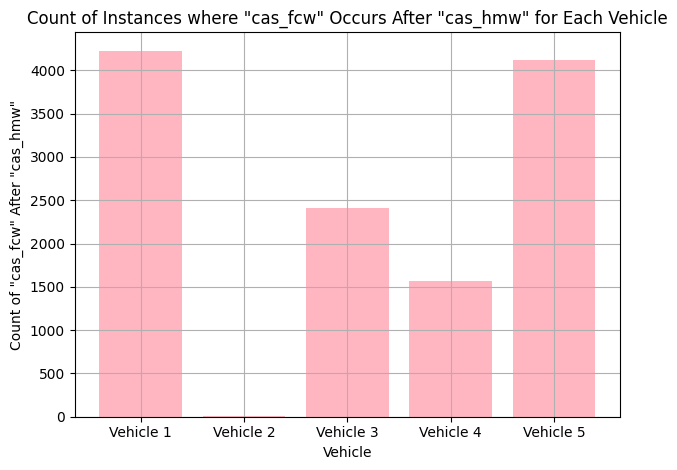

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files for each vehicle into separate DataFrames
vehicle1_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_805.csv')
vehicle2_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_1995.csv')
vehicle3_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_2846.csv')
vehicle4_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_3143 (1).csv')
vehicle5_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_5339.csv')

vehicle1_hmw = vehicle1_data[vehicle1_data['Alert'] == 'cas_hmw']
vehicle2_hmw = vehicle2_data[vehicle2_data['Alert'] == 'cas_hmw']
vehicle3_hmw = vehicle3_data[vehicle3_data['Alert'] == 'cas_hmw']
vehicle4_hmw = vehicle4_data[vehicle4_data['Alert'] == 'cas_hmw']
vehicle5_hmw = vehicle5_data[vehicle5_data['Alert'] == 'cas_hmw']
    
def check_for_fcw_after_hmw(hmw_data, fcw_data):
    found_instances = 0
    # Iterate through 'cas_hmw' rows
    for hmw_index, hmw_row in hmw_data.iterrows():
        # Get the date and time of 'cas_hmw'
        hmw_date = hmw_row['Date']
        hmw_time = hmw_row['Time']
        
        # Check if there's a corresponding 'cas_fcw' row with the same date and time
        matching_fcw = fcw_data[
            (fcw_data['Date'] == hmw_date) &
            (fcw_data['Time'] == hmw_time) &
            (fcw_data['Vehicle'] == hmw_row['Vehicle'])  # Ensure it's the same vehicle
        ]
        
        if not matching_fcw.empty:
            found_instances += 1
    
    return found_instances

# Check for 'cas_fcw' after 'cas_hmw' for each vehicle
found_vehicle1 = check_for_fcw_after_hmw(vehicle1_hmw, vehicle1_data)
found_vehicle2 = check_for_fcw_after_hmw(vehicle2_hmw, vehicle2_data)
found_vehicle3 = check_for_fcw_after_hmw(vehicle3_hmw, vehicle3_data)
found_vehicle4 = check_for_fcw_after_hmw(vehicle4_hmw, vehicle4_data)
found_vehicle5 = check_for_fcw_after_hmw(vehicle5_hmw, vehicle5_data)

# Create a bar chart to visualize the count of instances where 'cas_fcw' occurs after 'cas_hmw' for each vehicle
vehicles = ['Vehicle 1', 'Vehicle 2', 'Vehicle 3', 'Vehicle 4', 'Vehicle 5']
found_counts = [found_vehicle1, found_vehicle2, found_vehicle3, found_vehicle4, found_vehicle5]

plt.bar(vehicles, found_counts, color='lightpink')
plt.xlabel('Vehicle')
plt.ylabel('Count of "cas_fcw" After "cas_hmw"')
plt.title('Count of Instances where "cas_fcw" Occurs After "cas_hmw" for Each Vehicle')
plt.grid(True)
plt.tight_layout()
plt.show()


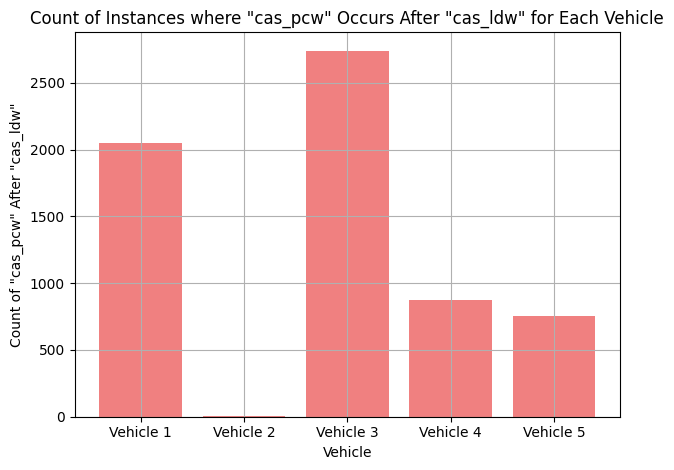

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files for each vehicle into separate DataFrames
vehicle1_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_805.csv')
vehicle2_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_1995.csv')
vehicle3_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_2846.csv')
vehicle4_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_3143 (1).csv')
vehicle5_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_5339.csv')

vehicle1_ldw = vehicle1_data[vehicle1_data['Alert'] == 'cas_ldw']
vehicle2_ldw = vehicle2_data[vehicle2_data['Alert'] == 'cas_ldw']
vehicle3_ldw = vehicle3_data[vehicle3_data['Alert'] == 'cas_ldw']
vehicle4_ldw = vehicle4_data[vehicle4_data['Alert'] == 'cas_ldw']
vehicle5_ldw = vehicle5_data[vehicle5_data['Alert'] == 'cas_ldw']

def check_for_pcw_after_ldw(ldw_data, pcw_data):
    found_instances = 0
    # Iterate through 'cas_ldw' rows
    for ldw_index, ldw_row in ldw_data.iterrows():
        # Get the date and time of 'cas_ldw'
        ldw_date = ldw_row['Date']
        ldw_time = ldw_row['Time']
        
        # Check if there's a corresponding 'cas_pdw' row with the same date and time
        matching_pdw = pcw_data[
            (pcw_data['Date'] == ldw_date) &
            (pcw_data['Time'] == ldw_time) &
            (pcw_data['Vehicle'] == ldw_row['Vehicle'])  # Ensure it's the same vehicle
        ]
        
        if not matching_pdw.empty:
            found_instances += 1
    
    return found_instances

# Check for 'cas_pdw' after 'cas_ldw' for each vehicle
found_vehicle1 = check_for_pcw_after_ldw(vehicle1_ldw, vehicle1_data)
found_vehicle2 = check_for_pcw_after_ldw(vehicle2_ldw, vehicle2_data)
found_vehicle3 = check_for_pcw_after_ldw(vehicle3_ldw, vehicle3_data)
found_vehicle4 = check_for_pcw_after_ldw(vehicle4_ldw, vehicle4_data)
found_vehicle5 = check_for_pcw_after_ldw(vehicle5_ldw, vehicle5_data)

# Create a bar chart to visualize the count of instances where 'cas_pdw' occurs after 'cas_ldw' for each vehicle
vehicles = ['Vehicle 1', 'Vehicle 2', 'Vehicle 3', 'Vehicle 4', 'Vehicle 5']
found_counts = [found_vehicle1, found_vehicle2, found_vehicle3, found_vehicle4, found_vehicle5]

plt.bar(vehicles, found_counts, color='lightcoral')
plt.xlabel('Vehicle')
plt.ylabel('Count of "cas_pcw" After "cas_ldw"')
plt.title('Count of Instances where "cas_pcw" Occurs After "cas_ldw" for Each Vehicle')
plt.grid(True)
plt.tight_layout()
plt.show()


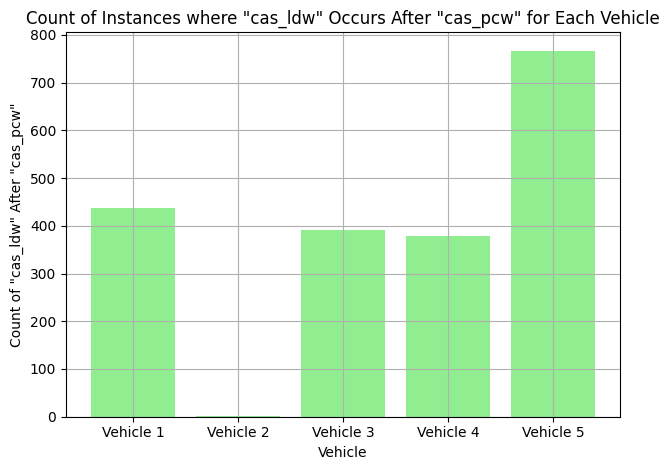

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files for each vehicle into separate DataFrames
vehicle1_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_805.csv')
vehicle2_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_1995.csv')
vehicle3_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_2846.csv')
vehicle4_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_3143 (1).csv')
vehicle5_data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\vehicle_5339.csv')

vehicle1_pcw = vehicle1_data[vehicle1_data['Alert'] == 'cas_pcw']
vehicle2_pcw = vehicle2_data[vehicle2_data['Alert'] == 'cas_pcw']
vehicle3_pcw = vehicle3_data[vehicle3_data['Alert'] == 'cas_pcw']
vehicle4_pcw = vehicle4_data[vehicle4_data['Alert'] == 'cas_pcw']
vehicle5_pcw = vehicle5_data[vehicle5_data['Alert'] == 'cas_pcw']

def check_for_ldw_after_pcw(pcw_data, ldw_data):
    found_instances = 0
    # Iterate through 'cas_pcw' rows
    for pcw_index, pcw_row in pcw_data.iterrows():
        # Get the date and time of 'cas_pcw'
        pcw_date = pcw_row['Date']
        pcw_time = pcw_row['Time']
        
        # Check if there's a corresponding 'cas_ldw' row with the same date and time
        matching_ldw = ldw_data[
            (ldw_data['Date'] == pcw_date) &
            (ldw_data['Time'] == pcw_time) &
            (ldw_data['Vehicle'] == pcw_row['Vehicle'])  # Ensure it's the same vehicle
        ]
        
        if not matching_ldw.empty:
            found_instances += 1
    
    return found_instances

# Check for 'cas_ldw' after 'cas_pcw' for each vehicle
found_vehicle1 = check_for_ldw_after_pcw(vehicle1_pcw, vehicle1_data)
found_vehicle2 = check_for_ldw_after_pcw(vehicle2_pcw, vehicle2_data)
found_vehicle3 = check_for_ldw_after_pcw(vehicle3_pcw, vehicle3_data)
found_vehicle4 = check_for_ldw_after_pcw(vehicle4_pcw, vehicle4_data)
found_vehicle5 = check_for_ldw_after_pcw(vehicle5_pcw, vehicle5_data)

# Create a bar chart to visualize the count of instances where 'cas_ldw' occurs after 'cas_pcw' for each vehicle
vehicles = ['Vehicle 1', 'Vehicle 2', 'Vehicle 3', 'Vehicle 4', 'Vehicle 5']
found_counts = [found_vehicle1, found_vehicle2, found_vehicle3, found_vehicle4, found_vehicle5]

plt.bar(vehicles, found_counts, color='lightgreen')
plt.xlabel('Vehicle')
plt.ylabel('Count of "cas_ldw" After "cas_pcw"')
plt.title('Count of Instances where "cas_ldw" Occurs After "cas_pcw" for Each Vehicle')
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualizing cas_hmw alert of all vehicles 

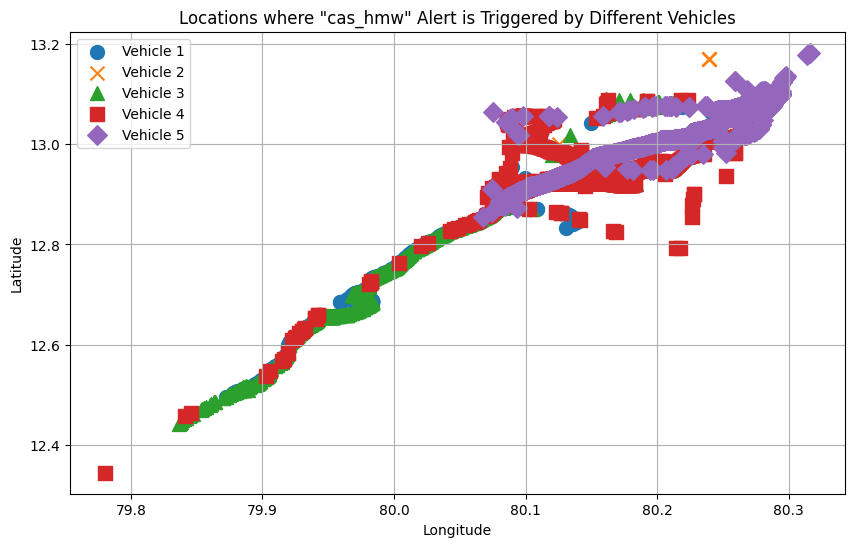

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create an empty plot
plt.figure(figsize=(10, 6))

# List of vehicle data files
vehicle_files = [
    'vehicle_805.csv',
    'vehicle_1995.csv',
    'vehicle_2846.csv',
    'vehicle_3143 (1).csv',
    'vehicle_5339.csv'
]

# Marker styles for each vehicle
markers = ['o', 'x', '^', 's', 'D']

# Iterate through vehicle files and markers
for i, file_name in enumerate(vehicle_files):
    # Load the vehicle data
    vehicle_data = pd.read_csv(rf'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\Splitted date time\{file_name}')
    
    # Filter data for 'cas_hmw' alerts
    cas_hmw_data = vehicle_data[vehicle_data['Alert'] == 'cas_hmw']
    
    # Plot the locations for this vehicle using the corresponding marker
    plt.scatter(cas_hmw_data['Long'], cas_hmw_data['Lat'], label=f'Vehicle {i+1}', marker=markers[i], s=100)

# Set plot labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations where "cas_hmw" Alert is Triggered by Different Vehicles')
plt.legend()
plt.grid(True)
plt.show()


## Average Speed vs Alert

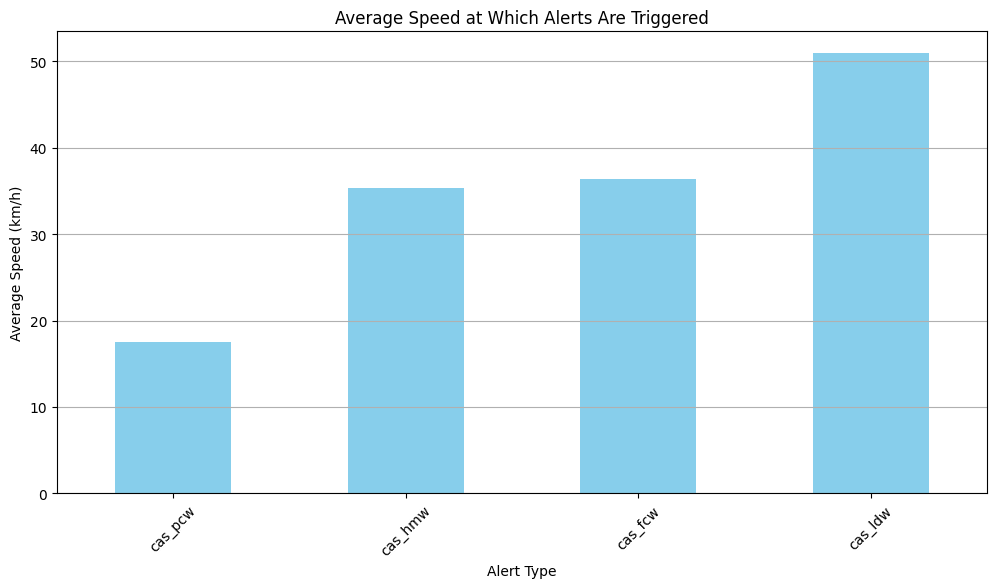

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV dataset into a pandas DataFrame
data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\unnati_phase1_data_revised.csv')  # Replace with your actual file path

# Group the data by alert types and calculate the average speed for each alert
alert_speeds = data.groupby('Alert')['Speed'].mean().sort_values()

# Create a bar plot to visualize the average speed at which each alert is triggered
plt.figure(figsize=(12, 6))
alert_speeds.plot(kind='bar', color='skyblue')
plt.title('Average Speed at Which Alerts Are Triggered')
plt.xlabel('Alert Type')
plt.ylabel('Average Speed (km/h)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Assessing the quantity of alerts within the speed range

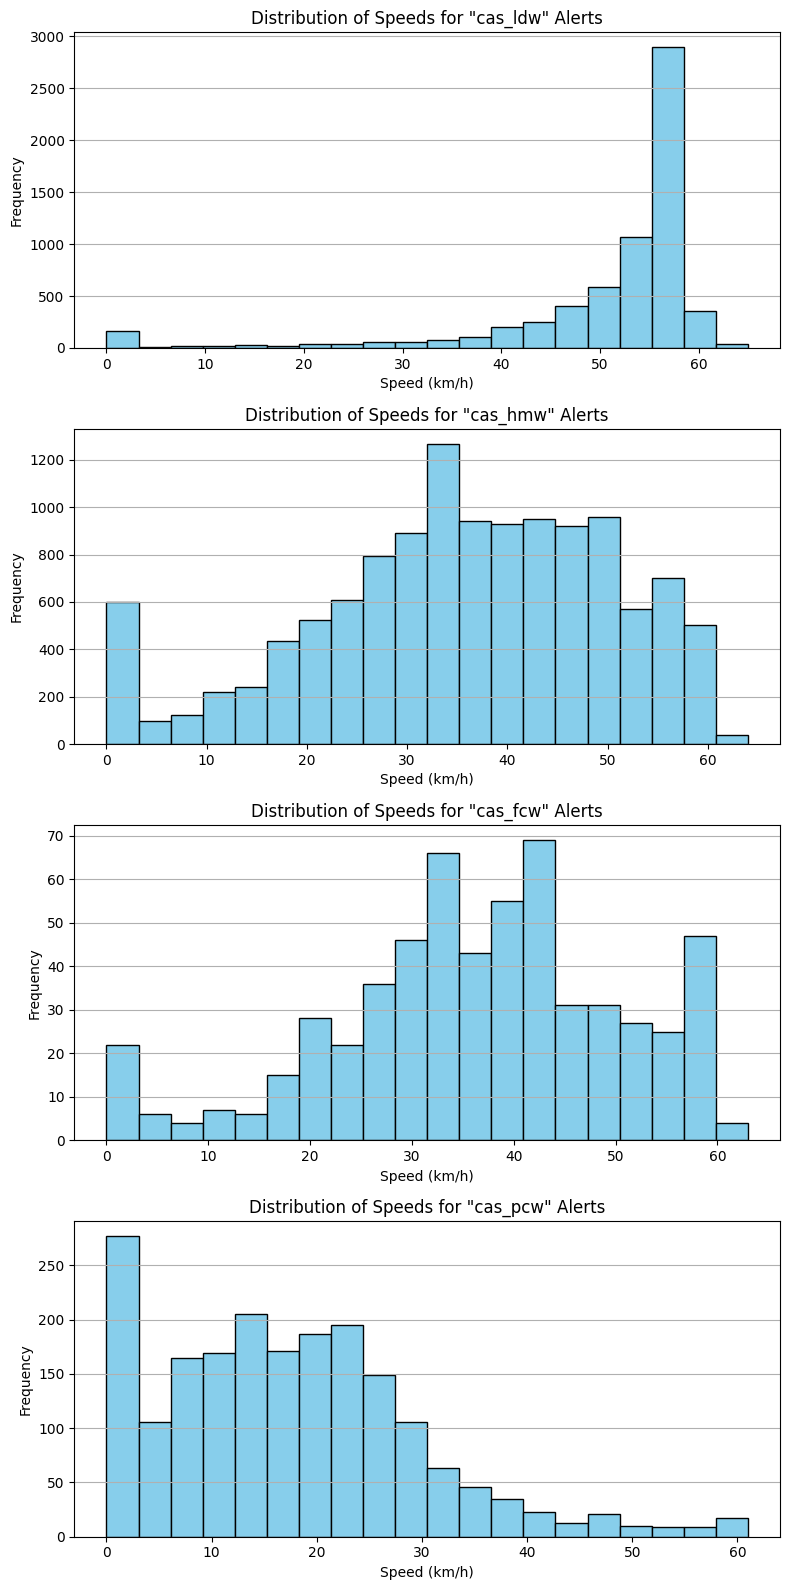

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV dataset into a pandas DataFrame
data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\unnati_phase1_data_revised.csv')  # Replace with your actual file path

# Get a list of unique alert types in the dataset
unique_alerts = data['Alert'].unique()

# Create subplots with one plot below each other, adjusting figsize for larger plots
fig, axes = plt.subplots(len(unique_alerts), 1, figsize=(8, 4 * len(unique_alerts)))

# Iterate through each unique alert type
for i, alert_type in enumerate(unique_alerts):
    # Filter the data for the current alert type
    alert_data = data[data['Alert'] == alert_type]

    # Create a histogram to visualize the distribution of speeds for the current alert type
    axes[i].hist(alert_data['Speed'], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of Speeds for "{alert_type}" Alerts')
    axes[i].set_xlabel('Speed (km/h)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


## Finding if there are any significance variations in alert count using Analysis of Varience test (ANOVA)

In [33]:
import pandas as pd
import numpy as np
from scipy import stats

# Load your CSV dataset into a pandas DataFrame
data = pd.read_csv(r'D:\Samsthidhaa\Intel Unnati Challenge\unnati_phase1_data_revised\unnati_phase1_data_revised.csv')  # Replace with your actual file path

import pandas as pd
import scipy.stats as stats



# Group the data by 'Vehicle' and 'Alert', and count the occurrences of each combination
alert_counts = data.groupby(['Vehicle', 'Alert']).size().unstack(fill_value=0)

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*[alert_counts[alert_type] for alert_type in alert_counts.columns])

# Interpret the results
if p_value < 0.05:
    print("There are significant differences in alert counts between vehicles.")
else:
    print("There are no significant differences in alert counts between vehicles.")


There are significant differences in alert counts between vehicles.


In [37]:
alert_counts = data.groupby('Vehicle')['Alert'].count()
print(alert_counts)

Vehicle
805     6875
1995      18
2846    5686
3143    2904
5339    5842
Name: Alert, dtype: int64


## Visualizing the significant variations using radar plot

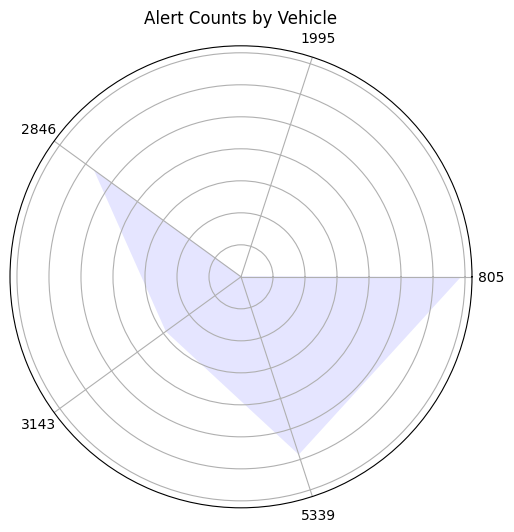

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your alert counts)
vehicle_names = ['805', '1995', '2846', '3143', '5339']
alert_counts =[6875, 18, 5686, 2904, 5842]

# Create a radar chart function
def radar_chart(data, title):
    categories = vehicle_names
    N = len(categories)

    # Angles for each category
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    # Values for each category (alert counts)
    values = alert_counts
    values += values[:1]

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, 'b', alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_yticklabels([])  # Hide y-axis labels
    ax.set_title(title)

# Plot the radar chart
radar_chart(alert_counts, 'Alert Counts by Vehicle')

plt.show()
